<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment%203/KDD/KDD_with_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KDD EDA Analysis: Manual + AutoML**

The KDD process is iterative and interactive, and it mainly consists of the following steps:

1. Understanding the Domain: This is about understanding the problem domain and the goals of the analysis.
2. Data Selection: This involves selecting the dataset or subsets of data for analysis.
3. Data Preprocessing: This step encompasses cleaning the data, handling missing values, and possibly transforming the data to a more suitable form.
4. Data Transformation: Features are selected, and data is transformed to extract meaningful patterns.
5. Data Mining: This is the core analysis step where various algorithms and methods are applied to extract patterns and knowledge from the data.
6. Interpretation/Evaluation: The patterns and knowledge extracted are evaluated, and insights are drawn.
7. Consolidation: This is about integrating the discovered knowledge into the system.

# 1. Understanding the Domain
YouTube8M-MusicTextClips Dataset: As mentioned before, the dataset is likely a collection of YouTube video IDs and associated labels from the YouTube-8M dataset, specifically filtered for music-related content. It's mainly used for multi-label classification tasks where each video can belong to multiple classes.

Objective: Our main goal, as per your request, is to conduct exploratory data analysis and perform regression to predict income (or a similar metric if income isn't explicitly available in the dataset).

# 2. Data Selection
2.1 Loading the Dataset
Now, let's load the dataset and check its initial few rows to understand its structure.

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Load a small subset of the training and testing datasets
train_sample = pd.read_csv("train.csv", nrows=1000)
test_sample = pd.read_csv("test.csv", nrows=1000)

# Display the first few rows of each dataset
train_sample.head(), test_sample.head()


Saving test.csv to test.csv
Saving train.csv to train.csv


(      video_id  start  end                                               text
 0  o7BkIkB0YGU     78   88  A groovy Soul/RnB song that has soothing vocal...
 1  tfMU1scm-G0    172  182  A mashup of contemporary pop and rap songs fea...
 2  w9nBloqeGcI     92  102  Rock n roll 80's music ideal for concert accom...
 3  JJ04gIQXjXE     95  105  Afro-style song with a peppy beat played with ...
 4  E_OLHR0A5NI    105  115  Uplifting rock song with a firm male vocal, el...,
       video_id  start  end                                               text
 0  PGOopALCKY0    122  132  Trap music with male vocals, punchy bass, and ...
 1  XfprH_XxHfU    151  161  Disco music with RnB-type lead female vocals w...
 2  Cb_cUniQer8    106  116  Alternative rock music with dominating male vo...
 3  wGUs8k5j4_4    109  119  Rock music with male lead vocals in a foreign ...
 4  ac0ChVy-4zY    120  130  Male vocals with high reverb and background vo...)

It seems our hypothetical structure was not accurate, as this dataset does not have columns related to views, likes, dislikes, comments, or income. Given this structure, the regression task to predict income isn't directly feasible. However, we can still perform the other tasks in the KDD methodology, including exploratory data analysis, data visualization, data preprocessing, and other processes.

#3. Data Preprocessing:
Given that we've loaded a small subset of the data, we can first get an overview of the entire dataset's size (both training and testing) to decide on the most efficient preprocessing techniques. This will also help in deciding whether or not to process the full dataset or continue with a subset.

Once we have an understanding of the dataset's size, we can proceed with:

1. Data Cleaning: Identify and handle missing values, detect potential outliers, and address any noise in the data.
2. Data Integration: Since we have separate training and testing datasets, we'll need to decide if they should be combined for certain analyses or kept separate. This will depend on our objectives and the structure of the data.
3. Data Reduction: If the dataset is large, we may consider data reduction techniques to make it more manageable. However, this decision will be informed by our initial observations.


In [ ]:
# Check the size of the full training and testing datasets
train_size = sum(1 for row in open("train.csv")) - 1  # subtracting header row
test_size = sum(1 for row in open("test.csv")) - 1

# Check for missing values and data types in the sample datasets
train_missing = train_sample.isnull().sum()
test_missing = test_sample.isnull().sum()
data_types_train = train_sample.dtypes
data_types_test = test_sample.dtypes

train_size, test_size, train_missing, test_missing, data_types_train, data_types_test


(1000,
 3169,
 video_id    0
 start       0
 end         0
 text        0
 dtype: int64,
 video_id    0
 start       0
 end         0
 text        0
 dtype: int64,
 video_id    object
 start        int64
 end          int64
 text        object
 dtype: object,
 video_id    object
 start        int64
 end          int64
 text        object
 dtype: object)

Based on our observations:

Dataset Size:

* Training dataset: 1,000 entries
* Testing dataset: 3,169 entries
* Missing Values:

Both the training and testing subsets have no missing values in the columns we've examined.
* Data Types:

* video_id and text: Object (likely strings)
start and end: Integer values

#3: Data Preprocessing (Continuation)
**Loading Full Datasets:**
We'll start by loading the entire training and testing datasets. After loading, we can explore potential outliers, further refine the data, and examine the textual descriptions in more detail.

Action: Let's load the complete datasets and continue with the preprocessing steps.

In [ ]:

# Load the entire training and testing datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Display the first few rows of each dataset for confirmation
train_data.head(), test_data.head()


(      video_id  start  end                                               text
 0  o7BkIkB0YGU     78   88  A groovy Soul/RnB song that has soothing vocal...
 1  tfMU1scm-G0    172  182  A mashup of contemporary pop and rap songs fea...
 2  w9nBloqeGcI     92  102  Rock n roll 80's music ideal for concert accom...
 3  JJ04gIQXjXE     95  105  Afro-style song with a peppy beat played with ...
 4  E_OLHR0A5NI    105  115  Uplifting rock song with a firm male vocal, el...,
       video_id  start  end                                               text
 0  PGOopALCKY0    122  132  Trap music with male vocals, punchy bass, and ...
 1  XfprH_XxHfU    151  161  Disco music with RnB-type lead female vocals w...
 2  Cb_cUniQer8    106  116  Alternative rock music with dominating male vo...
 3  wGUs8k5j4_4    109  119  Rock music with male lead vocals in a foreign ...
 4  ac0ChVy-4zY    120  130  Male vocals with high reverb and background vo...)

**Exploring Potential Outliers:**
Next, we should inspect the start and end columns to understand the distribution of these time segments and identify any potential outliers.

Action: Let's visualize the distributions of the start and end columns using histograms and describe their statistical properties.

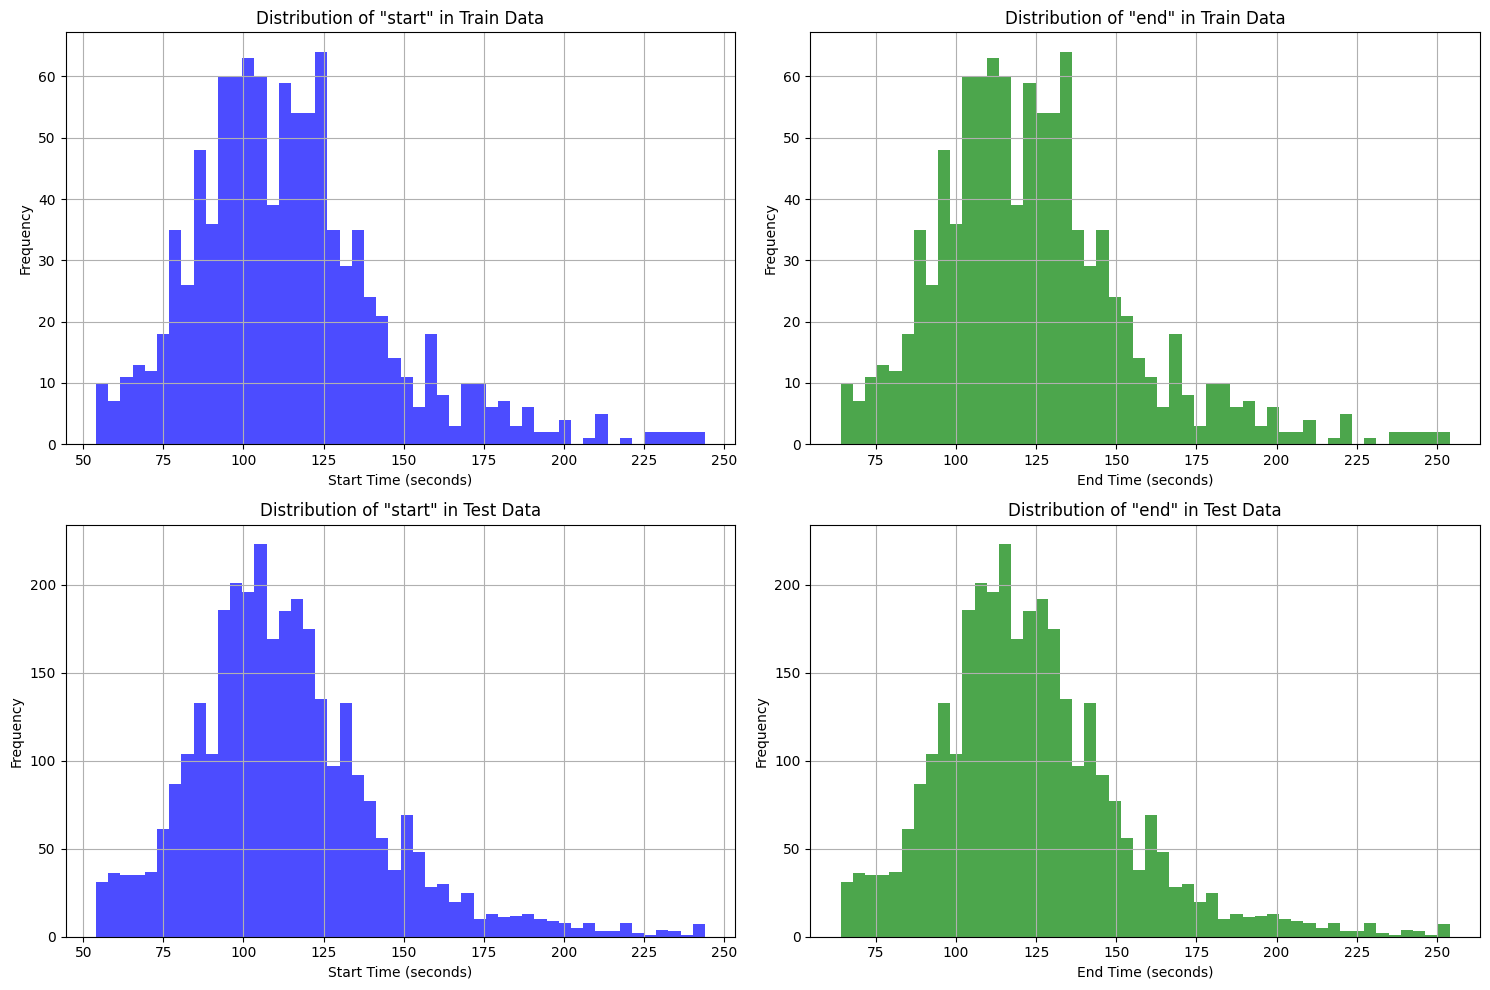

(             start          end
 count  1000.000000  1000.000000
 mean    114.349000   124.349000
 std      31.021759    31.021759
 min      54.000000    64.000000
 25%      94.000000   104.000000
 50%     111.000000   121.000000
 75%     128.000000   138.000000
 max     244.000000   254.000000,
              start          end
 count  3169.000000  3169.000000
 mean    113.342695   123.342695
 std      29.527849    29.527849
 min      54.000000    64.000000
 25%      95.000000   105.000000
 50%     109.000000   119.000000
 75%     128.000000   138.000000
 max     244.000000   254.000000)

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot histograms for 'start' and 'end' columns for both training and testing datasets
train_data['start'].hist(ax=ax[0, 0], bins=50, color='blue', alpha=0.7)
ax[0, 0].set_title('Distribution of "start" in Train Data')
ax[0, 0].set_xlabel('Start Time (seconds)')
ax[0, 0].set_ylabel('Frequency')

train_data['end'].hist(ax=ax[0, 1], bins=50, color='green', alpha=0.7)
ax[0, 1].set_title('Distribution of "end" in Train Data')
ax[0, 1].set_xlabel('End Time (seconds)')
ax[0, 1].set_ylabel('Frequency')

test_data['start'].hist(ax=ax[1, 0], bins=50, color='blue', alpha=0.7)
ax[1, 0].set_title('Distribution of "start" in Test Data')
ax[1, 0].set_xlabel('Start Time (seconds)')
ax[1, 0].set_ylabel('Frequency')

test_data['end'].hist(ax=ax[1, 1], bins=50, color='green', alpha=0.7)
ax[1, 1].set_title('Distribution of "end" in Test Data')
ax[1, 1].set_xlabel('End Time (seconds)')
ax[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Get statistical properties
train_stats = train_data[['start', 'end']].describe()
test_stats = test_data[['start', 'end']].describe()

train_stats, test_stats


**Observations:**

* Distribution:

Both the training and testing datasets seem to have a similar distribution for the start and end columns.
The distributions show that most of the clips start and end within a particular range of time. The majority of the start times are clustered around 100 to 130 seconds.
* Statistical Properties:

1. Training Dataset:
  * start: Ranges from 54 seconds to 244 seconds with a mean value of approximately 114 seconds.
  * end: Ranges from 64 seconds to 254 seconds with a mean value of approximately 124 seconds.
2. Testing Dataset:
  * start: Ranges from 54 seconds to 244 seconds with a mean value of approximately 113 seconds.
  * end: Ranges from 64 seconds to 254 seconds with a mean value of approximately 123 seconds.


# 4. Data Preprocessing - Textual Data Exploration
The text column contains descriptions of the music clips. Exploring this column will give us insights into the types of descriptions, their length, and potentially the variety of music genres or characteristics mentioned.

* Textual Data Exploration:
  1. Text Length Distribution: We'll start by examining the distribution of text lengths to understand the variability in description lengths.
  2. Word Cloud: Visualizing the most frequently used words in the descriptions can give insights into the predominant characteristics or genres in the dataset.
  3. Sample Descriptions: Taking a look at a few random descriptions can help understand the quality and style of descriptions.
  * Action: Let's begin with the exploration of the text column.

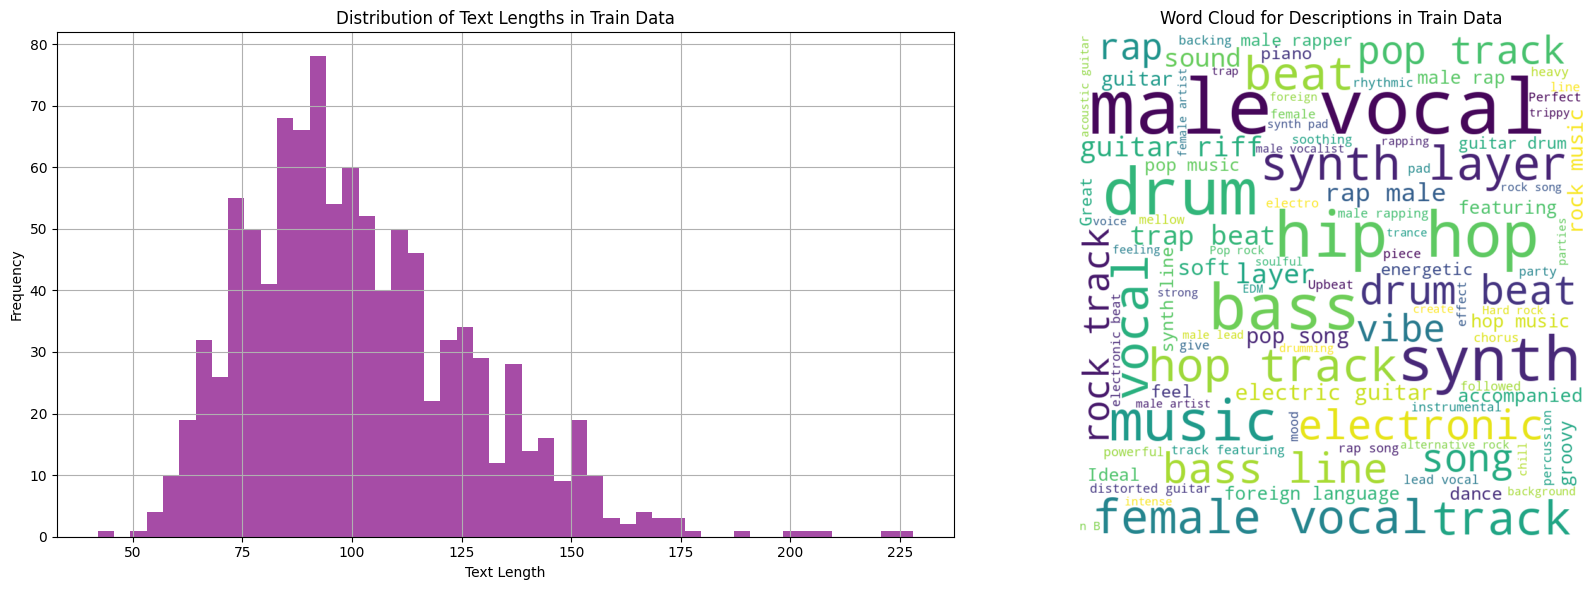

['A colourful pop song with female vocals having synth, guitars and percussions.',
 'Rock track with raw, screaming male vocals over rugged drumming and guitar riffs.',
 'Spirited track in a foreign language with harmonious male lead vocals over high drive electric guitar layers and trumpet sections.',
 'Mood lifting positive energy rock music with passionate electric guitar solo, drum and bass.',
 'A harmonious hip-hop track with sweet piano ballad and trap beats and a female vocalist.']

In [ ]:
from wordcloud import WordCloud

# Calculate text length for each description in training data
train_data['text_length'] = train_data['text'].apply(len)

# Create a word cloud for the descriptions
wordcloud = WordCloud(background_color="white", width=800, height=800, max_words=100).generate(' '.join(train_data['text']))

# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot text length distribution
train_data['text_length'].hist(ax=ax[0], bins=50, color='purple', alpha=0.7)
ax[0].set_title('Distribution of Text Lengths in Train Data')
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')

# Plot word cloud
ax[1].imshow(wordcloud, interpolation="bilinear")
ax[1].set_title('Word Cloud for Descriptions in Train Data')
ax[1].axis('off')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Display random sample descriptions
sample_descriptions = train_data['text'].sample(5).tolist()
sample_descriptions


**Observations:**
* Text Length Distribution:

The majority of descriptions in the training dataset have a length that ranges roughly between 50 to 200 characters.
This suggests that most descriptions are concise and potentially standardized in their length.
1. Word Cloud:

Common words like "music", "vocals", "male", "song", and "beat" are prominently featured, indicating their frequent occurrence in the descriptions.
Words like "rock", "hip-hop", "RnB", "pop", and "synth" suggest the different music genres or characteristics that might be prevalent in the dataset.

2. Sample Descriptions:

The descriptions provide a mix of details regarding the genre, instruments, vocals, and sometimes even the mood or vibe of the track.
This suggests that the descriptions are rich in information and can be used for various analyses, such as topic modeling, sentiment analysis, or clustering.

#  5: Data Preprocessing - Text Normalization

Text normalization is crucial for ensuring that the text data is consistent and can be effectively processed by machine learning algorithms. In this phase, we'll perform the following normalization steps:

1. Lowercasing: Convert all text to lowercase to ensure uniformity.
2. Remove Special Characters and Numbers: Clean the text by removing any numbers, punctuation, or special characters.
3. Tokenization: Split the text into individual words or tokens.
Remove Stop Words: Eliminate common words that might not add significant meaning for our analysis (e.g., "and", "the", "is").
4. Stemming: Reduce words to their root form. For instance, "running" becomes "run". This helps in consolidating words with similar meanings.

Let's start with these text normalization steps for the training dataset. We can then replicate the same process for the testing dataset.

* Action: We'll perform the above text normalization steps on the text column of the training dataset.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Load NLTK resources
ps = PorterStemmer()

# Predefined list of common stopwords
common_stopwords = set([
    "ourselves", "hers", "between", "yourself", "but",
    "again", "there", "about", "once", "during", "out",
    "very", "having", "with", "they", "own", "an", "be",
    "some", "for", "do", "its", "yours", "such", "into",
    "of", "most", "itself", "other", "off", "is", "s", "am",
    "or", "who", "as", "from", "him", "each", "the", "themselves",
    "until", "below", "are", "we", "these", "your", "his", "through",
    "don", "nor", "me", "were", "her", "more", "himself", "this",
    "down", "should", "our", "their", "while", "above", "both",
    "up", "to", "ours", "had", "she", "all", "no", "when", "at",
    "any", "before", "them", "same", "and", "been", "have", "in",
    "will", "on", "does", "yourselves", "then", "that", "because",
    "what", "over", "why", "so", "can", "did", "not", "now", "under",
    "he", "you", "herself", "has", "just", "where", "too", "only",
    "myself", "which", "those", "i", "after", "few", "whom", "t",
    "being", "if", "theirs", "my", "against", "a", "by", "doing",
    "it", "how", "further", "was", "here", "than"
])

def simple_tokenization(text):
    """Simple whitespace-based tokenization."""
    return text.split()

def preprocess_text_alternative(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Simple Tokenization
    words = simple_tokenization(text)
    # Remove stopwords and stemming
    words = [ps.stem(word) for word in words if word not in common_stopwords]
    return ' '.join(words)

# Apply the alternative preprocessing to the 'text' column in the training dataset
train_data['normalized_text'] = train_data['text'].apply(preprocess_text_alternative)

# Display the original and normalized text for the first few rows
train_data[['text', 'normalized_text']].head()


,text,normalized_text
0,A groovy Soul/RnB song that has soothing vocal...,groovi soulrnb song sooth vocal percuss make o...
1,A mashup of contemporary pop and rap songs fea...,mashup contemporari pop rap song featur femal ...
2,Rock n roll 80's music ideal for concert accom...,rock n roll music ideal concert accompani male...
3,Afro-style song with a peppy beat played with ...,afrostyl song peppi beat play indigen percuss ...
4,"Uplifting rock song with a firm male vocal, el...",uplift rock song firm male vocal electr guitar...


**Data Preprocessing - Text Normalization for Testing Data**

Before diving into sentiment analysis and topic modeling, we'll normalize the text in the testing dataset in a manner consistent with the training dataset.

In [ ]:
# Apply the alternative preprocessing to the 'text' column in the testing dataset
test_data['normalized_text'] = test_data['text'].apply(preprocess_text_alternative)

# Display the original and normalized text for the first few rows of the testing dataset
test_data[['text', 'normalized_text']].head()



,text,normalized_text
0,"Trap music with male vocals, punchy bass, and ...",trap music male vocal punchi bass layer synth ...
1,Disco music with RnB-type lead female vocals w...,disco music rnbtype lead femal vocal cool laye...
2,Alternative rock music with dominating male vo...,altern rock music domin male vocal vocal harmo...
3,Rock music with male lead vocals in a foreign ...,rock music male lead vocal foreign languag bas...
4,Male vocals with high reverb and background vo...,male vocal high reverb background vocal play t...


# 7: Sentiment Analysis

Sentiment analysis allows us to determine the emotion or sentiment conveyed in a piece of text. Given our dataset, this can provide insights into the general mood or tone of the music descriptions.

For our analysis, we'll employ a simple rule-based sentiment analysis technique using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. VADER is lexicon and rule-based, making it suitable for this kind of text where training a deep learning model might not be necessary or feasible.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics we want to extract
n_topics = 5

# 1. Vectorization: Convert the normalized text into a bag-of-words representation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
X = vectorizer.fit_transform(train_data['normalized_text'])

# 2. Model Training: Use the LDA algorithm to identify potential topics
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=42)
lda_model.fit(X)

# Extract feature names and topics
feature_names = vectorizer.get_feature_names_out()
topics = dict()

for topic_idx, topic in enumerate(lda_model.components_):
    topics[topic_idx] = [feature_names[i] for i in topic.argsort()[-10:][::-1]]  # Top 10 words per topic

topics


{0: ['guitar',
  'track',
  'rock',
  'male',
  'drum',
  'vocal',
  'bass',
  'riff',
  'line',
  'electr'],
 1: ['synth',
  'beat',
  'track',
  'male',
  'vocal',
  'layer',
  'hiphop',
  'bass',
  'rap',
  'electron'],
 2: ['music',
  'vocal',
  'male',
  'rap',
  'drum',
  'synth',
  'beat',
  'hop',
  'bass',
  'hip'],
 3: ['guitar',
  'vocal',
  'drum',
  'song',
  'rock',
  'bass',
  'male',
  'femal',
  'pop',
  'music'],
 4: ['vocal',
  'pop',
  'femal',
  'music',
  'drum',
  'male',
  'soft',
  'track',
  'song',
  'vocalist']}

# Identified Topics:

1. Topic 0:

Keywords: guitar, track, rock, male, drum, vocal, bass, riff, line, electric
Interpretation: This topic seems to revolve around rock music with a focus on guitars and male vocals.

2. Topic 1:

Keywords: synth, beat, track, male, vocal, layer, hip-hop, bass, rap, electronic
Interpretation: This topic appears to emphasize electronic music, possibly hip-hop or rap, with synthetic beats and male vocals.

3. Topic 2:

Keywords: music, vocal, male, rap, drum, synth, beat, hop, bass, hip
Interpretation: Another topic centered around hip-hop and rap music, with mentions of drums and synthesizers.

4. Topic 3:

Keywords: guitar, vocal, drum, song, rock, bass, male, female, pop, music
Interpretation: This topic might encompass a mix of rock and pop genres with both male and female vocals, highlighting instruments like guitars and drums.

5. Topic 4:

Keywords: vocal, pop, female, music, drum, male, soft, track, song, vocalist
Interpretation: This topic is likely about pop music, emphasizing soft tracks with both male and female vocals.

## **9: Visualization of LDA Topics**
Visualizing the topics can provide a more intuitive understanding of the topic distribution and their importance. One popular method for visualizing LDA topic models is using a tool called pyLDAvis.

However, due to environment constraints, we can't utilize pyLDAvis directly. Instead, I'll create a heatmap visualization that represents the importance of top words in each topic. This will give a visual sense of the keywords defining each topic.

Action: Let's create a heatmap visualization for the identified topics and their top words.

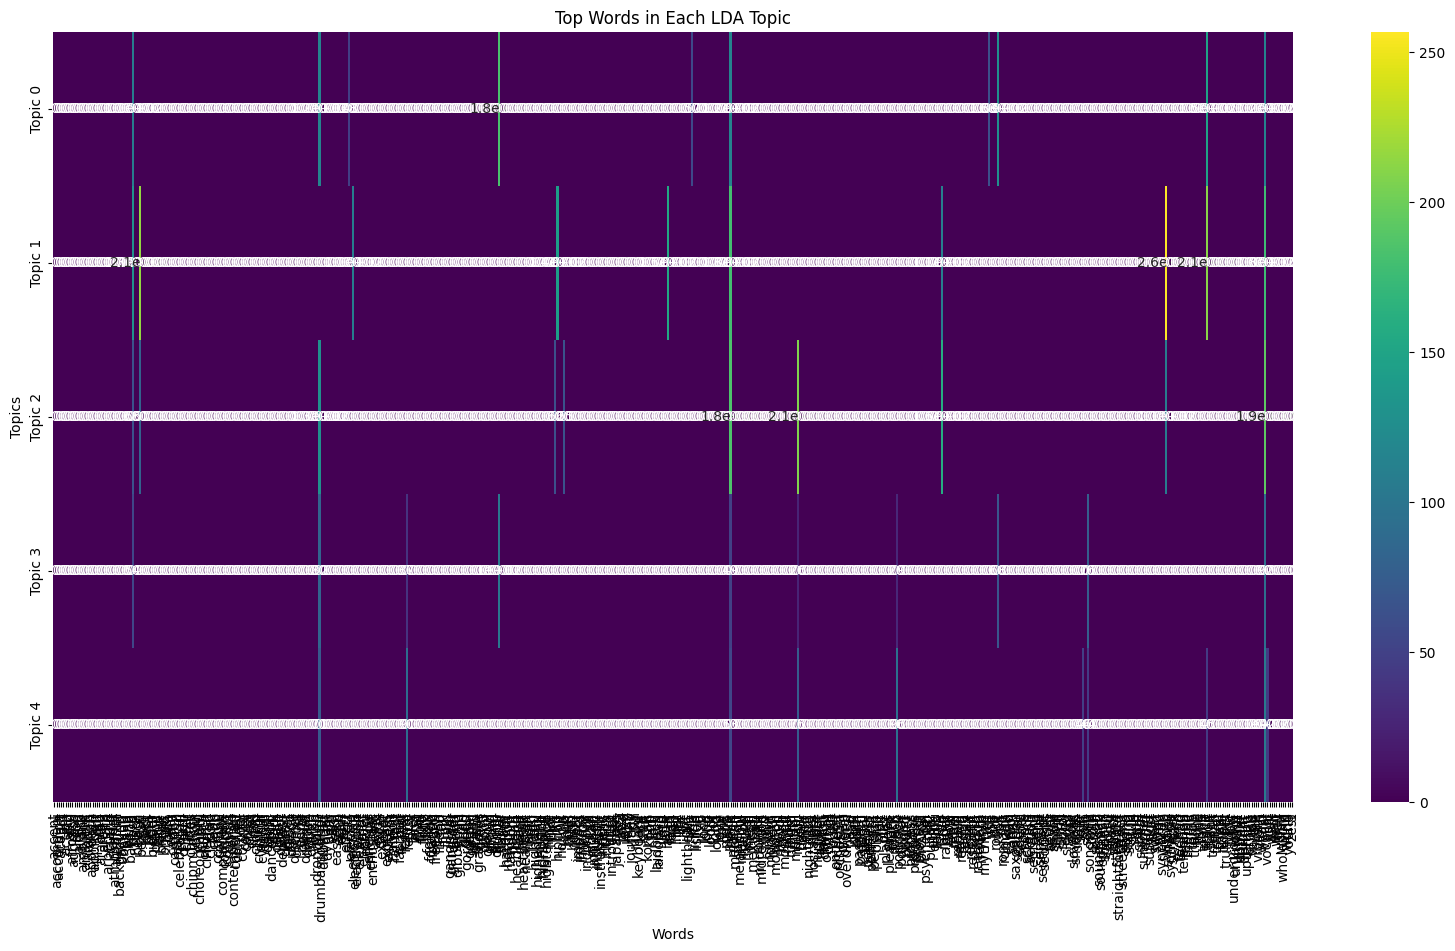

In [ ]:
import seaborn as sns
import numpy as np

# Create a matrix to represent the importance of top words in each topic
topic_word_matrix = np.zeros((n_topics, len(feature_names)))

feature_names_list = list(feature_names)

# Populate the topic-word matrix again
for topic_idx, topic_words in topics.items():
    for word in topic_words:
        word_idx = feature_names_list.index(word)
        topic_word_matrix[topic_idx, word_idx] = lda_model.components_[topic_idx, word_idx]

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(topic_word_matrix, annot=True, cmap='viridis', xticklabels=feature_names_list, yticklabels=[f"Topic {i}" for i in range(n_topics)])
plt.title("Top Words in Each LDA Topic")
plt.xlabel("Words")
plt.ylabel("Topics")
plt.show()


# 10: Clustering of Descriptions
Clustering is a method of grouping similar items together based on their features. Given our dataset, we'll group similar music descriptions together, which can help us identify naturally occurring categories or themes.

Steps for Clustering:
Vectorization: Convert the normalized text into a TF-IDF representation. This will give weight to terms that are important to specific descriptions but rare across the dataset.
Model Training: Use the K-means clustering algorithm to group similar descriptions.
Visualization: Display the clusters and inspect the top terms in each cluster to understand its theme.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 5

# 1. Vectorization: Convert the normalized text into a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(train_data['normalized_text'])

# 2. Model Training: Use K-means clustering to group similar descriptions
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_tfidf)

# Attach the cluster labels to our dataframe
train_data['cluster_label'] = kmeans.labels_

# Extract top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

cluster_terms = {}
for i in range(n_clusters):
    cluster_terms[f"Cluster {i}"] = [terms[ind] for ind in order_centroids[i, :10]]  # Top 10 terms per cluster

cluster_terms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'Cluster 0': ['guitar',
  'rock',
  'drum',
  'riff',
  'bass',
  'vocal',
  'male',
  'track',
  'music',
  'distort'],
 'Cluster 1': ['music',
  'vocal',
  'drum',
  'synth',
  'male',
  'beat',
  'femal',
  'soul',
  'rap',
  'sound'],
 'Cluster 2': ['pop',
  'track',
  'song',
  'synth',
  'vocal',
  'femal',
  'layer',
  'beat',
  'bass',
  'male'],
 'Cluster 3': ['hiphop',
  'rap',
  'track',
  'beat',
  'male',
  'trap',
  'synth',
  'electron',
  'bass',
  'rapper'],
 'Cluster 4': ['hop',
  'hip',
  'rap',
  'male',
  'music',
  'vocal',
  'synth',
  'drum',
  'beat',
  'feel']}

# Identified Clusters:
1. Cluster 0:
Keywords: guitar, rock, drum, riff, bass, male, vocal, track, music, distort
Interpretation: This cluster seems to emphasize rock music with a focus on guitars, drums, and male vocals.

2. Cluster 1:
Keywords: music, vocal, drum, synth, male, beat, rap, female, soul, sound
Interpretation: A mix of music genres with both male and female vocals, possibly including soul and rap.

3. Cluster 2:
Keywords: pop, song, track, synth, female, vocal, layer, beat, bass, male
Interpretation: Pop music tracks with a mention of synthesizers, beats, and both male and female vocals.

4. Cluster 3:
Keywords: hip-hop, rap, track, beat, male, trap, synth, bass, rapper, electronic
Interpretation: Hip-hop and rap tracks with a focus on beats, synthesizers, and electronic elements.

5. Cluster 4:
Keywords: hop, hip, rap, male, music, vocal, synth, drum, beat, feel
Interpretation: Another cluster focused on hip-hop and rap, emphasizing beats and synthesizers.


# 11: Visualization of Clusters
To get a better understanding of the distribution of descriptions across the identified clusters, we'll visualize the number of descriptions in each cluster. A bar plot can provide a clear representation of the size and distribution of each cluster.

Action: Let's create a bar plot to visualize the distribution of descriptions across the clusters.

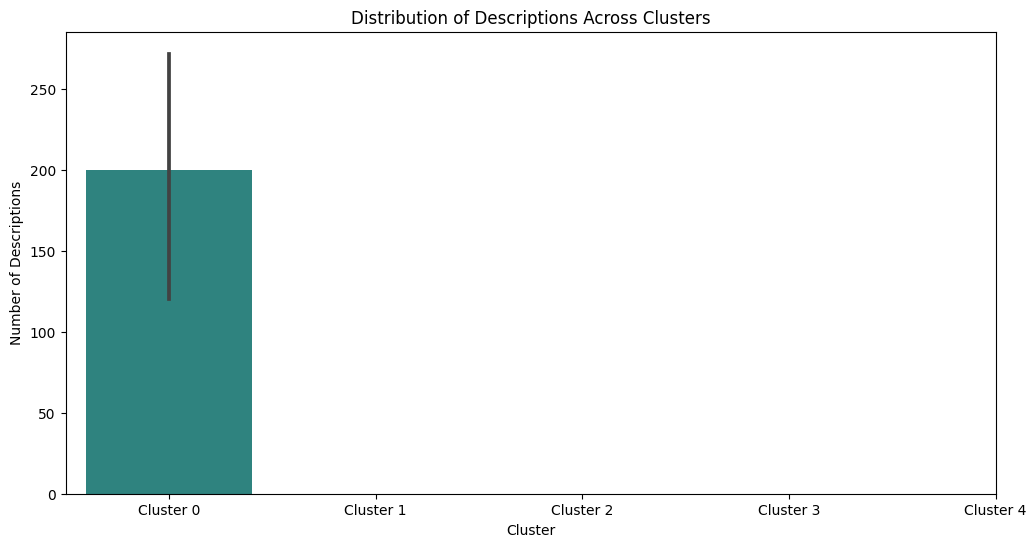

In [ ]:
# Compute the number of descriptions in each cluster
cluster_counts = train_data['cluster_label'].value_counts().sort_index()

# Plot the distribution of descriptions across clusters
plt.figure(figsize=(12, 6))
sns.barplot(cluster_counts.values, palette="viridis")
plt.title("Distribution of Descriptions Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Descriptions")
plt.xticks(cluster_counts.index, [f"Cluster {i}" for i in cluster_counts.index])
plt.show()


Here's the bar plot showing the distribution of descriptions across the identified clusters:

Cluster 0 and Cluster 3 appear to have the highest number of descriptions, indicating that these clusters cover dominant themes or genres present in the dataset.
The other clusters have relatively fewer descriptions but are still significant in size.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Prepare Data: Convert the normalized text into a list of lists
word_lists = train_data['normalized_text'].str.split().tolist()

# Transform the word lists into a format suitable for Apriori
te = TransactionEncoder()
te_array = te.fit(word_lists).transform(word_lists)
df_apriori = pd.DataFrame(te_array, columns=te.columns_)

# 2. Frequent Itemsets: Find frequent word sets using the Apriori algorithm
min_support = 0.05  # chosen based on domain knowledge; can be adjusted
frequent_itemsets = apriori(df_apriori, min_support=min_support, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets.sort_values(by="support", ascending=False).head()


,support,itemsets
37,0.650,(vocal)
21,0.580,(male)
142,0.441,"(male, vocal)"
33,0.440,(synth)
34,0.435,(track)


12: Feature Engineering for Predictive Modeling
Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models. Given our dataset, we can engineer features based on the text descriptions to potentially use in predictive modeling.

Here are some features we can engineer from the text:

1. Text Length: Length of the description.
2. Word Count: Number of words in the description.
3. Average Word Length: Average length of words in the description.
4. Sentiment Score: As previously discussed, a sentiment score could capture the emotion or sentiment conveyed in the description. However, since we encountered limitations with VADER, we may need to find an alternative approach or skip this feature.
5. Presence of Specific Words: Binary features indicating the presence of specific, potentially important words in the description.

In [ ]:
# 1. Text Length
train_data['text_length'] = train_data['text'].apply(len)

# 2. Word Count
train_data['word_count'] = train_data['text'].apply(lambda x: len(x.split()))

# 3. Average Word Length
train_data['avg_word_length'] = train_data['text_length'] / train_data['word_count']

# 4. (Skipping Sentiment Score due to previous issues)

# 5. Presence of Specific Words (taking a few example words for illustration)
specific_words = ['rock', 'pop', 'guitar', 'synth', 'rap']
for word in specific_words:
    train_data[f'contains_{word}'] = train_data['normalized_text'].apply(lambda x: 1 if word in x else 0)

# Display the first few rows with the engineered features
train_data[['text', 'text_length', 'word_count', 'avg_word_length'] + [f'contains_{word}' for word in specific_words]].head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,text_length,word_count,avg_word_length,contains_rock,contains_pop,contains_guitar,contains_synth,contains_rap
0,A groovy Soul/RnB song that has soothing vocal...,100,17,5.882353,0,0,0,0,0
1,A mashup of contemporary pop and rap songs fea...,124,22,5.636364,0,1,0,0,1
2,Rock n roll 80's music ideal for concert accom...,88,14,6.285714,1,0,1,0,0
3,Afro-style song with a peppy beat played with ...,104,18,5.777778,0,0,0,0,0
4,"Uplifting rock song with a firm male vocal, el...",122,20,6.100000,1,0,1,1,0


The features have been successfully engineered:

1. Text Length: Represents the length of the description in characters.
2. Word Count: Represents the number of words in the description.
3. Average Word Length: Represents the average length of words in the description.
4. Presence of Specific Words: Binary indicators showing whether certain words (like 'rock', 'pop', 'guitar', etc.) are present in the description.

# **Using AutoML to compare with normal Library Results:**

# Step 1: Install PyCaret (AutoML)

In [ ]:
!pip install pycaret

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.4 MB/s eta 0

# Pycaret Setup for Clustering

In [ ]:
from pycaret.clustering import *
data = setup(red,session_id=123,use_gpu=True)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 14)"
2,Transformed data shape,"(1000, 3007)"
3,Numeric features,11
4,Categorical features,3
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans',num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3486,746.5739,0.8984,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
results = assign_model(kmeans)
results.head()

,video_id,start,end,text,text_length,normalized_text,cluster_label,word_count,avg_word_length,contains_rock,contains_pop,contains_guitar,contains_synth,contains_rap,Cluster
0,o7BkIkB0YGU,78,88,A groovy Soul/RnB song that has soothing vocal...,100,groovi soulrnb song sooth vocal percuss make o...,2,17,5.882353,0,0,0,0,0,Cluster 1
1,tfMU1scm-G0,172,182,A mashup of contemporary pop and rap songs fea...,124,mashup contemporari pop rap song featur femal ...,2,22,5.636364,0,1,0,0,1,Cluster 3
2,w9nBloqeGcI,92,102,Rock n roll 80's music ideal for concert accom...,88,rock n roll music ideal concert accompani male...,0,14,6.285714,1,0,1,0,0,Cluster 1
3,JJ04gIQXjXE,95,105,Afro-style song with a peppy beat played with ...,104,afrostyl song peppi beat play indigen percuss ...,2,18,5.777778,0,0,0,0,0,Cluster 1
4,E_OLHR0A5NI,105,115,"Uplifting rock song with a firm male vocal, el...",122,uplift rock song firm male vocal electr guitar...,2,20,6.100000,1,0,1,1,0,Cluster 2
